In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

gdf_uf = gpd.read_file("BR_UF_2024.shp")
df_regiao = pd.read_csv("dados_bolsa_por_regiao.csv")

gdf_uf["regiao"] = gdf_uf["NM_REGIA"]

gdf = gdf_uf.merge(df_regiao, on="regiao")

# 🔥 dissolve por região (remove divisões internas)
gdf_regiao = gdf.dissolve(by="regiao", aggfunc="first")


In [7]:
df_regiao = pd.read_csv(
    "dados_bolsa_por_regiao.csv",
    sep=","
)

print(df_regiao.columns)


Index(['regiao', 'total_registros'], dtype='object')


In [10]:
def limpa_regiao(s):
    return (
        s.astype(str)
         .str.strip()
         .str.replace("–", "-", regex=False)
         .str.replace("—", "-", regex=False)
         .str.replace("-", "", regex=False)
         .str.replace(" ", "", regex=False)
         .str.lower()
    )


In [11]:
gdf_uf["regiao_key"] = limpa_regiao(gdf_uf["NM_REGIA"])
df_regiao["regiao_key"] = limpa_regiao(df_regiao["regiao"])

gdf = gdf_uf.merge(df_regiao, on="regiao_key", how="left")
gdf_regiao = gdf.dissolve(by="NM_REGIA", aggfunc="first")


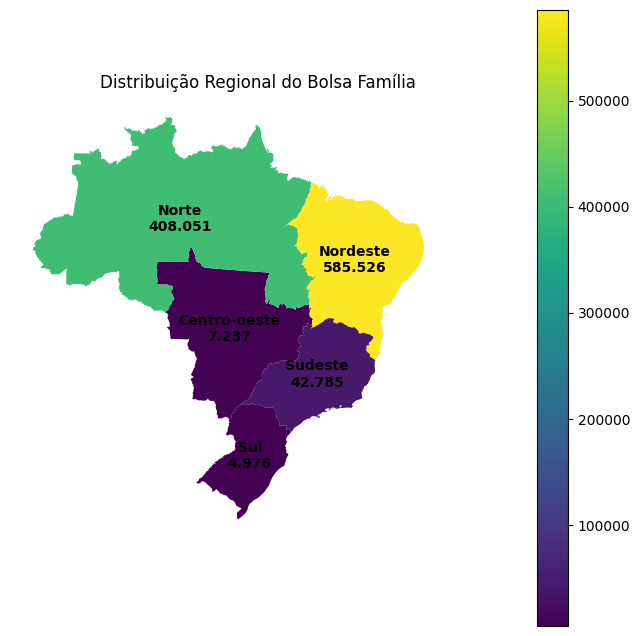

In [12]:
fig, ax = plt.subplots(figsize=(8,8))

gdf_regiao.plot(column="total_registros", legend=True, ax=ax)

for nome, row in gdf_regiao.iterrows():
    if pd.notna(row["total_registros"]):
        x, y = row.geometry.centroid.coords[0]
        ax.text(
            x, y,
            f"{nome}\n{int(row['total_registros']):,}".replace(",", "."),
            ha="center", va="center", fontsize=10, weight="bold"
        )

ax.set_title("Distribuição Regional do Bolsa Família")
ax.axis("off")
plt.show()


In [14]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

df_uf = pd.read_csv("ocorrencias_por_uf.csv")
gdf_uf = gpd.read_file("BR_UF_2024.shp")


In [16]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

df_uf = pd.read_csv("ocorrencias_por_uf.csv")
gdf_uf = gpd.read_file("BR_UF_2024.shp")


In [17]:
df_uf["uf"] = df_uf["uf"].str.strip().str.upper()
gdf_uf["SIGLA_UF"] = gdf_uf["SIGLA_UF"].str.strip().str.upper()


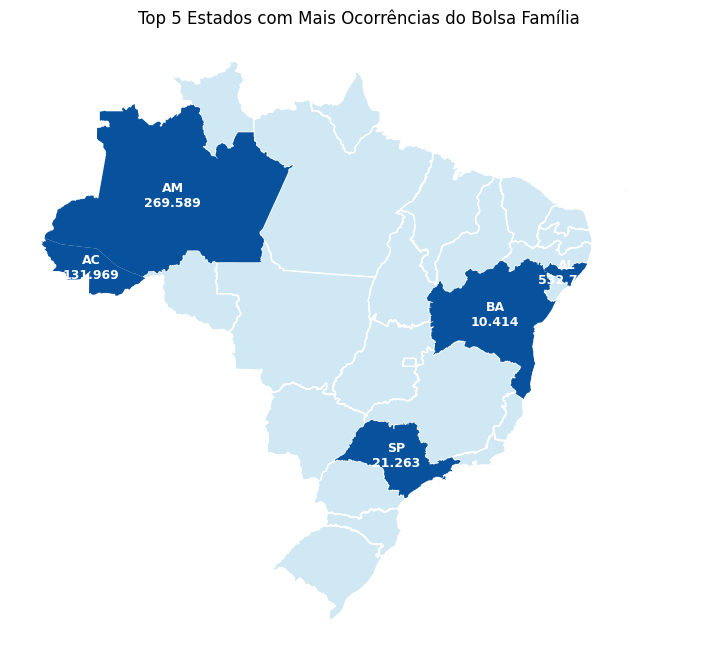

: 

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# leitura
df_uf = pd.read_csv("ocorrencias_por_uf.csv")
gdf_uf = gpd.read_file("BR_UF_2024.shp")

# padronização
df_uf["uf"] = df_uf["uf"].str.strip().str.upper()
gdf_uf["SIGLA_UF"] = gdf_uf["SIGLA_UF"].str.strip().str.upper()

# merge
gdf = gdf_uf.merge(
    df_uf,
    left_on="SIGLA_UF",
    right_on="uf",
    how="left"
)

# top 5
top5 = gdf.sort_values(
    "total_ocorrencias",
    ascending=False
).head(5)

# plot
fig, ax = plt.subplots(figsize=(9, 9))

# 🔵 mapa base (azul claro)
gdf.plot(
    ax=ax,
    color="#cfe8f3",       # azul claro suave
    edgecolor="white"
)

# 🔥 top 5 destacado
top5.plot(
    ax=ax,
    color="#08519c"        # azul escuro só nos destaques
)

# ✍️ rótulos
for _, row in top5.iterrows():
    x, y = row.geometry.centroid.coords[0]
    ax.text(
        x,
        y,
        f"{row['SIGLA_UF']}\n{int(row['total_ocorrencias']):,}".replace(",", "."),
        ha="center",
        va="center",
        fontsize=9,
        weight="bold",
        color="white"
    )

ax.set_title("Top 5 Estados com Mais Ocorrências do Bolsa Família")
ax.axis("off")
plt.show()


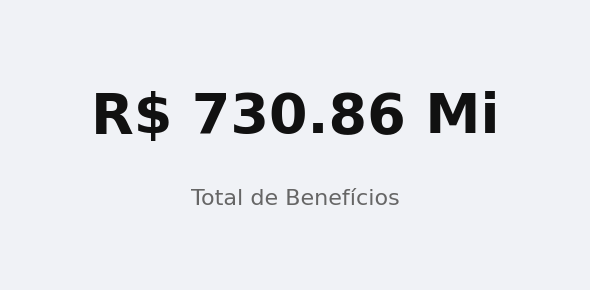

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carregar os dados
df = pd.read_csv('valor_total_beneficios.csv')
valor = df['total_beneficios'].iloc[0]

# 2. Formatação do valor (Ex: 730.86 Mi)
if valor >= 1_000_000_000:
    valor_formatado = f"R$ {valor / 1_000_000_000:.2f} Bi"
elif valor >= 1_000_000:
    valor_formatado = f"R$ {valor / 1_000_000:.2f} Mi"
else:
    valor_formatado = f"R$ {valor:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')

label = "Total de Benefícios"

# 3. Criar a visualização do cartão
fig, ax = plt.subplots(figsize=(6, 3))

# Definir cores de fundo
fig.patch.set_facecolor('#f0f2f6') # Cor de fundo da área externa
ax.set_facecolor('#ffffff')        # Cor de fundo do cartão

# Remover os eixos (bordas, números, tracinhos)
ax.axis('off')

# Adicionar o texto do Valor (grande e em destaque)
ax.text(0.5, 0.6, valor_formatado, 
        fontsize=40, fontweight='bold', color='#111111', 
        ha='center', va='center')

# Adicionar o Rótulo/Label (menor e cinza)
ax.text(0.5, 0.3, label, 
        fontsize=16, color='#666666', 
        ha='center', va='center')

# Ajustar e salvar
plt.tight_layout()
plt.savefig('power_bi_card.png', dpi=300, bbox_inches='tight', facecolor='#f0f2f6')